### Why Advanced Customization?
To make your data communicate clearly, look professional, and be publication-ready — especially useful in dashboards, presentations, and reports.

### What Are Subplots in Matplotlib?
Subplots allow you to display multiple plots in a single figure, organized in rows and columns. This is useful for comparing data side by side, or creating dashboards.

#### Matplotlib’s subplots come in two main forms:

plt.subplot() — creates one subplot at a time in a grid layout.

plt.subplots() — creates the whole grid at once, returning figure and axes.

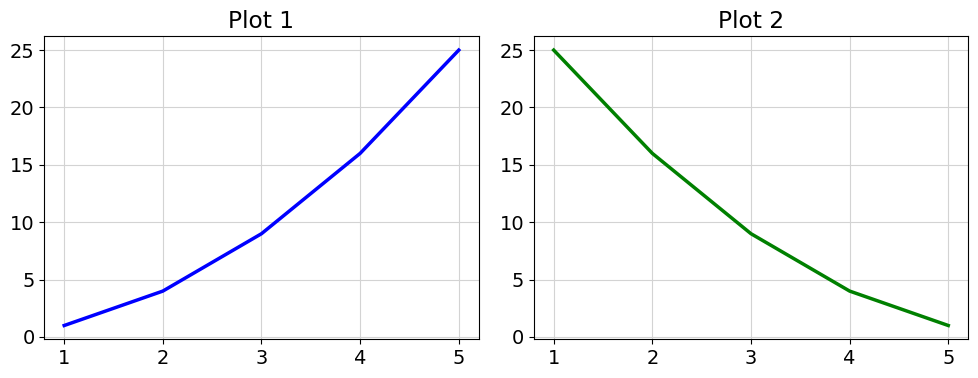

In [142]:
#Method 1: plt.subplot()
#Create subplots one by one.
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [25, 16, 9, 4, 1]

plt.figure(figsize=(10, 4))

# First subplot
plt.subplot(1, 2, 1)   # 1 row, 2 columns, 1st plot
plt.plot(x, y1, color='blue')
plt.title('Plot 1')

# Second subplot
plt.subplot(1, 2, 2)   # 1 row, 2 columns, 2nd plot
plt.plot(x, y2, color='green')
plt.title('Plot 2')

plt.tight_layout()
plt.show()


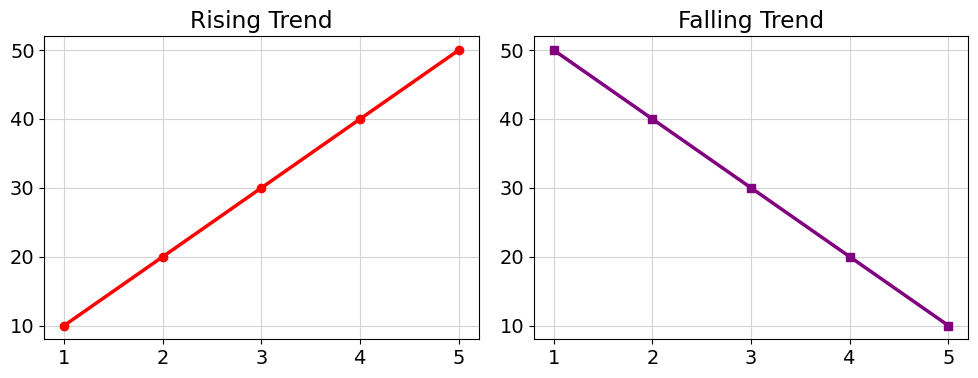

In [144]:
#Method 2: fig, ax = plt.subplots()
#Best and modern way — more flexible and powerful.
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [10, 20, 30, 40, 50]
y2 = [50, 40, 30, 20, 10]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax[0].plot(x, y1, marker='o', color='red')
ax[0].set_title('Rising Trend')

ax[1].plot(x, y2, marker='s', color='purple')
ax[1].set_title('Falling Trend')

plt.tight_layout()
plt.show()


In [146]:
# Looping Through Axes:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in range(2):
    for j in range(2):
        axs[i, j].plot(x, [val**(i + j + 1) for val in x])
        axs[i, j].set_title(f'Power {i+j+1}')


### 🎯 Challenges and Solutions in Using **Subplots** with Matplotlib


## ⚠️ Challenge 1: **Overlapping Plots / Crowded Layout**

When multiple subplots are placed close together, titles, labels, or ticks can overlap or be hard to read.

### ✅ Solution:

* Use `plt.tight_layout()` to automatically adjust spacing.
* Or use `fig.subplots_adjust()` for manual spacing control.

```python
plt.tight_layout()  # Best for auto-fix
# Or manually:
fig.subplots_adjust(hspace=0.4, wspace=0.3)
```

---

## ⚠️ Challenge 2: **Too Many Subplots in One Figure**

Displaying too many plots (e.g. a 4x4 grid) can make the figure unreadable.

### ✅ Solution:

* Reduce number of subplots or split into multiple figures.
* Increase `figsize=(width, height)`.
* Use `sharex=True` or `sharey=True` to reduce axis clutter.

```python
fig, ax = plt.subplots(4, 4, figsize=(16, 12), sharex=True, sharey=True)
```

---

## ⚠️ Challenge 3: **Managing Axes (Indexing Errors)**

Accessing subplots like `ax[i, j]` throws errors when the layout is 1D (like 1 row or 1 column).

### ✅ Solution:

* Always check if `ax` is a 1D or 2D array.
* Use `np.ravel()` or `.flatten()` to access them in a loop safely.

```python
# Safer looping
axes = ax.flatten()
for i, ax in enumerate(axes):
    ax.plot(x, data[i])
```

---

## ⚠️ Challenge 4: **Different Chart Types in One Subplot Grid**

Mixing scatter, bar, line, and pie in the same grid requires careful axis handling.

### ✅ Solution:

* Customize each axis individually (e.g., `ax[0,1].bar()`, `ax[1,0].scatter()`).
* Turn off axis where needed (e.g., `ax[1,1].axis('off')` for pie).

```python
ax[0,0].bar(x, y)
ax[0,1].plot(x, y)
ax[1,0].scatter(x, y)
ax[1,1].pie(y, labels=x)
```

---

## ⚠️ Challenge 5: **Legends and Titles Not Matching**

Legends can overlap or not appear for individual plots. Titles might be too long for subplot.

### ✅ Solution:

* Add titles and legends per subplot using `ax.set_title()` and `ax.legend()`.
* Use `fontsize`, `loc`, or truncate long titles.

```python
ax.set_title("Revenue by Year", fontsize=12)
ax.legend(loc='upper right')
```

---

## ⚠️ Challenge 6: **Dynamic or Unknown Number of Subplots**

You want to create subplots for a dynamic number of datasets.

### ✅ Solution:

* Use a loop with flexible layout (e.g., `nrows`, `ncols = math.ceil(n/2), 2`)
* Use `fig.add_subplot()` for variable plotting.

---

### 💡 Bonus Tips:

* Use **Seaborn's `FacetGrid`** or **Matplotlib's `gridspec`** for advanced subplot layouts.
* Always **label axes** and use **consistent color themes**.

---



### What is gridspec?
GridSpec lets you specify the exact location and size of each subplot in a flexible grid.

In [150]:
#Basic Syntax
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 2)  # 2 rows, 2 columns

ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
ax3 = fig.add_subplot(gs[1, :])  # Bottom row, full width


In [152]:
#Advanced Example: Uneven Layout
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(3, 3)

ax1 = fig.add_subplot(gs[0, :2])     # Row 0, columns 0 and 1 (wide)
ax2 = fig.add_subplot(gs[0, 2])      # Row 0, column 2
ax3 = fig.add_subplot(gs[1:, 0])     # Rows 1 and 2, column 0 (tall)
ax4 = fig.add_subplot(gs[1, 1:])     # Row 1, columns 1 and 2
ax5 = fig.add_subplot(gs[2, 1:])     # Row 2, columns 1 and 2



### 💥 Challenges & ✅ Solutions of Using `GridSpec`

---

#### 🔸 1. **Complexity in Layout Design**

* **Challenge**: As layout complexity increases, it becomes hard to mentally visualize how subplots fit into the grid.
* **Solution**:

  * Start by sketching the grid on paper.
  * Use `gs.tight_layout(fig)` or `fig.tight_layout()` to avoid overlapping.
  * Keep subplot indexing consistent and readable.

```python
# Use clear variable names for axes
ax_line = fig.add_subplot(gs[0, :])
ax_bar = fig.add_subplot(gs[1:, 0])
```

---

#### 🔸 2. **Axes Overlapping**

* **Challenge**: Subplots may overlap, especially when using tight grids or labels.
* **Solution**:

  * Use `plt.subplots_adjust(hspace, wspace)` to increase spacing.
  * Use `constrained_layout=True` or `tight_layout()`.

```python
fig = plt.figure(constrained_layout=True)
```

---

#### 🔸 3. **Unequal Plot Sizes Look Unbalanced**

* **Challenge**: Uneven subplot sizes (like one subplot covering multiple rows) can make the chart visually awkward.
* **Solution**:

  * Carefully plan proportions using `gs[row_start:row_end, col_start:col_end]`.
  * Add visual balance using titles, color, or annotations.

---

#### 🔸 4. **Difficult to Debug Errors**

* **Challenge**: `IndexError` from misreferencing rows/columns.
* **Solution**:

  * Always double-check `GridSpec(row, col)` before referencing.
  * Print `gs[row, col]` while debugging.

---

#### 🔸 5. **Colorbar or Legends Misplaced**

* **Challenge**: Colorbars/legends in subplots can overlap or not fit.
* **Solution**:

  * Use `gridspec.GridSpecFromSubplotSpec` for nested layouts.
  * Or place colorbar with a dedicated subplot.

```python
cbar_ax = fig.add_subplot(gs[2, :])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
```

---

#### 🔸 6. **Reusability**

* **Challenge**: Hard to reuse a `gridspec` layout in another chart.
* **Solution**:

  * Create reusable functions for layout setup.
  * Use `subplot_mosaic()` in recent versions of Matplotlib for cleaner syntax.

---

### ✅ Summary Table

| Challenge                   | Solution                                          |
| --------------------------- | ------------------------------------------------- |
| Complex layout design       | Sketch first, use clear axis names                |
| Overlapping plots           | `tight_layout()`, `subplots_adjust()`             |
| Unbalanced visuals          | Plan spans carefully, use visual cues             |
| Indexing errors             | Print grid dimensions, break into parts           |
| Misplaced legends/colorbars | Use dedicated axes for legends/colorbars          |
| Reusability                 | Create layout functions or use `subplot_mosaic()` |

---





## 🎨 1. **Basic Color Options**

You can use:

* **Color names**: `'red'`, `'blue'`, `'green'`, `'orange'`, etc.
* **Hex codes**: `'#FF5733'`, `'#4CAF50'`
* **RGB tuples**: `(0.1, 0.2, 0.5)`
* **Grayscale**: `str` values from `'0.0'` (black) to `'1.0'` (white)

```python
plt.plot(x, y, color='skyblue')
plt.bar(x, height, color='#FF6347')  # tomato color
```

---

## 🧱 2. **Colormaps (Built-in)**

For **gradients, heatmaps, or scatter color scaling**:

### 🔹 Sequential

Best for ordered data
`'Blues'`, `'Greens'`, `'Oranges'`, `'Purples'`, `'YlGnBu'`

### 🔹 Diverging

Highlight deviation from a center
`'coolwarm'`, `'bwr'`, `'seismic'`

### 🔹 Categorical / Qualitative

Best for labels/groups
`'Set1'`, `'Set2'`, `'Pastel1'`, `'Dark2'`, `'tab10'`, `'Accent'`

```python
plt.scatter(x, y, c=z, cmap='viridis')  # or plt.cm.Blues
```

Use `plt.colormaps()` to list all.

---

## 🌈 3. **Seaborn Palettes**

Seaborn has excellent palettes:

```python
import seaborn as sns

# Set global palette
sns.set_palette("pastel")

# Use in plot
sns.barplot(x='Category', y='Value', data=df, palette='Set2')
```

### 🔸 Popular palettes:

* `'pastel'`, `'muted'`, `'dark'`, `'colorblind'`
* `'Set1'`, `'Set2'`, `'Set3'`
* `'rocket'`, `'mako'`, `'flare'`, `'coolwarm'`

### 🎨 Custom palette

```python
custom_palette = ['#ff9999', '#66b3ff', '#99ff99']
sns.barplot(data=df, x='Category', y='Value', palette=custom_palette)
```

---

## 🎯 4. **Transparency and Style**

* **`alpha=`** controls transparency (`0` to `1`)

```python
plt.scatter(x, y, color='green', alpha=0.5)
```

* **`edgecolor`** or `facecolor` for shapes:

```python
plt.hist(data, color='blue', edgecolor='black')
```

---

## 🧠 Tips for Color Use in Data Viz

| Tip                                            | Description                                                      |
| ---------------------------------------------- | ---------------------------------------------------------------- |
| ✅ Use color to **emphasize**, not decorate     | Don’t use too many different colors unless needed                |
| 🎯 Use consistent color for the same variable  | Helps readability across multiple plots                          |
| 🌗 Use **colormaps** for gradient data         | Especially for heatmaps or continuous values                     |
| 👓 Use colorblind-friendly palettes            | Like `'colorblind'` or `'muted'`                                 |
| 🔲 Avoid strong saturation on dark backgrounds | Use `sns.set_style("darkgrid")` or manually set figure facecolor |

---



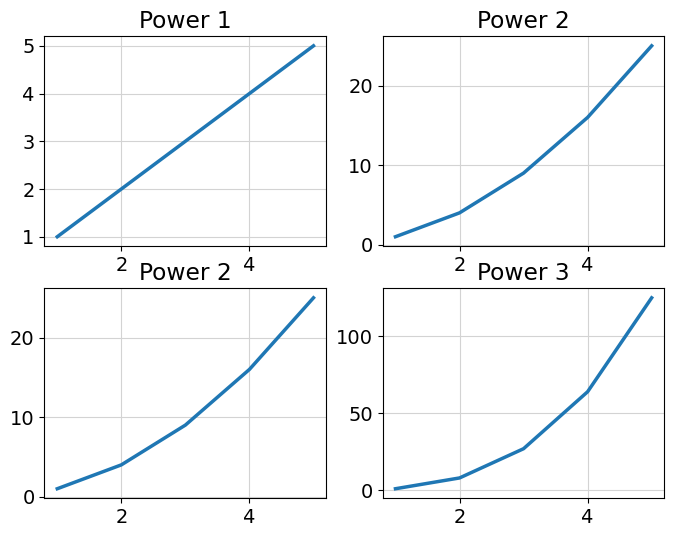

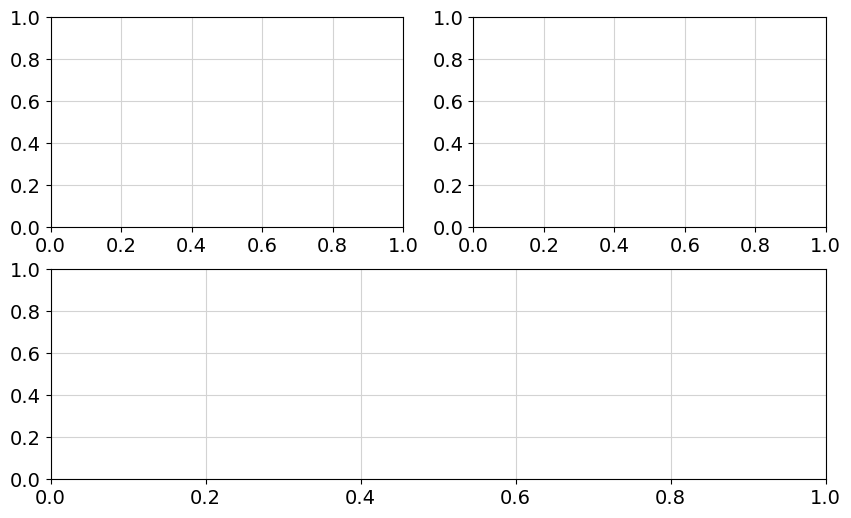

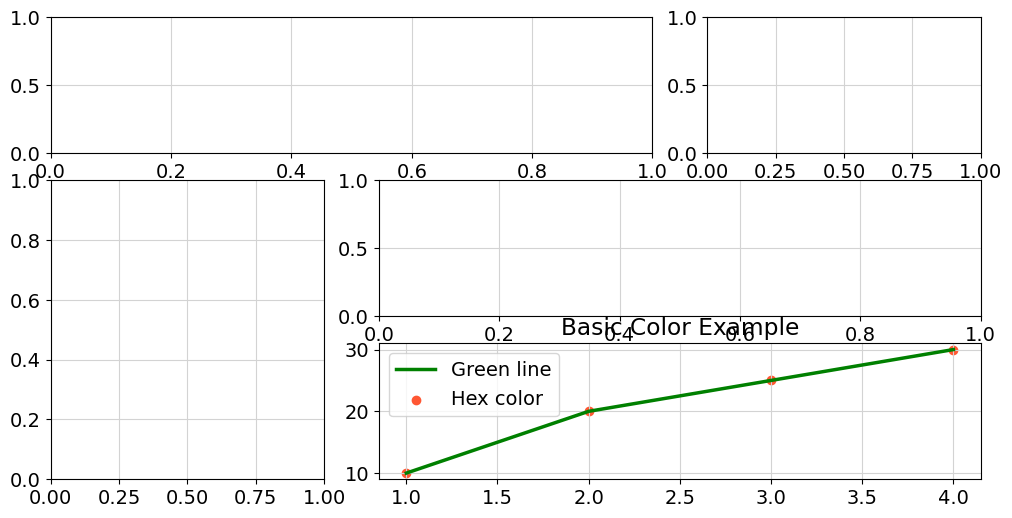

In [156]:
#Basic Color Options (Matplotlib)
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

plt.plot(x, y, color='green', label='Green line')
plt.scatter(x, y, color='#FF5733', label='Hex color')
plt.title('Basic Color Example')
plt.legend()
plt.show()


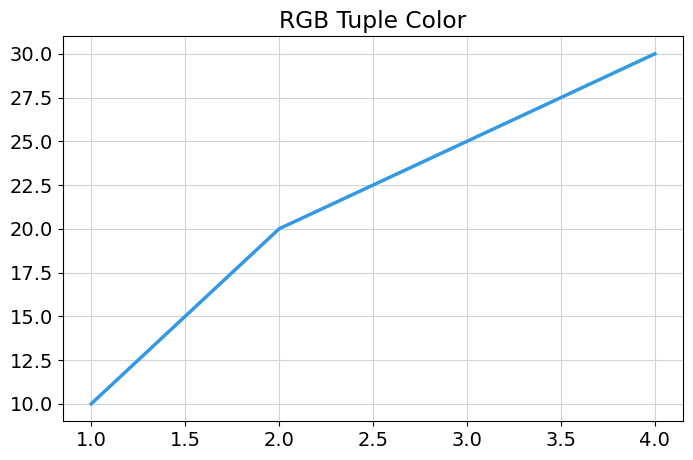

In [157]:
# Using RGB Tuples
import matplotlib.pyplot as plt

plt.plot(x, y, color=(0.2, 0.6, 0.9))  # Light blue RGB
plt.title('RGB Tuple Color')
plt.show()


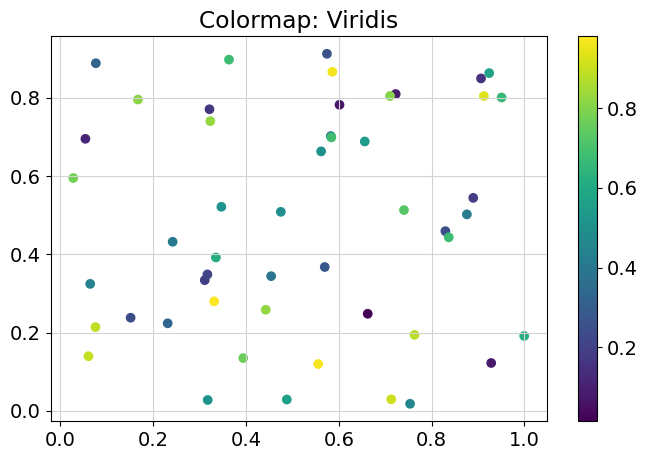

In [158]:
#Using Colormaps in Scatter Plot
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)  # color scale
plt.scatter(x, y, c=colors, cmap='viridis')
plt.colorbar()
plt.title('Colormap: Viridis')
plt.show()



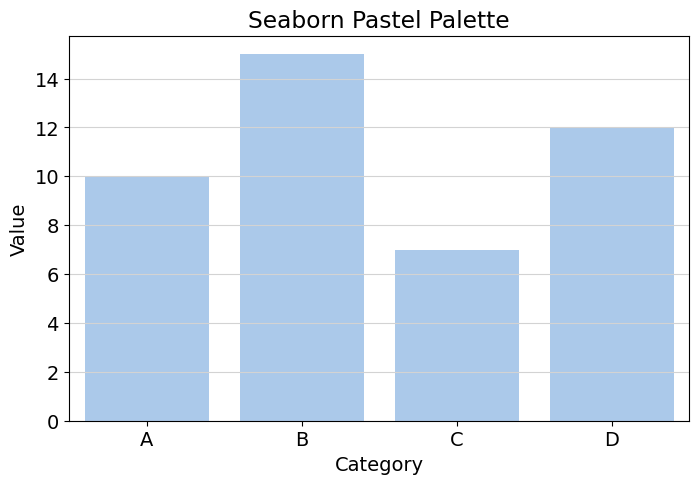

In [159]:
#Seaborn Built-in Palettes
import seaborn as sns
import pandas as pd

# Sample Data
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [10, 15, 7, 12]
})

# Set pastel palette
sns.set_palette("pastel")
sns.barplot(x='Category', y='Value', data=df)
plt.title('Seaborn Pastel Palette')
plt.show()


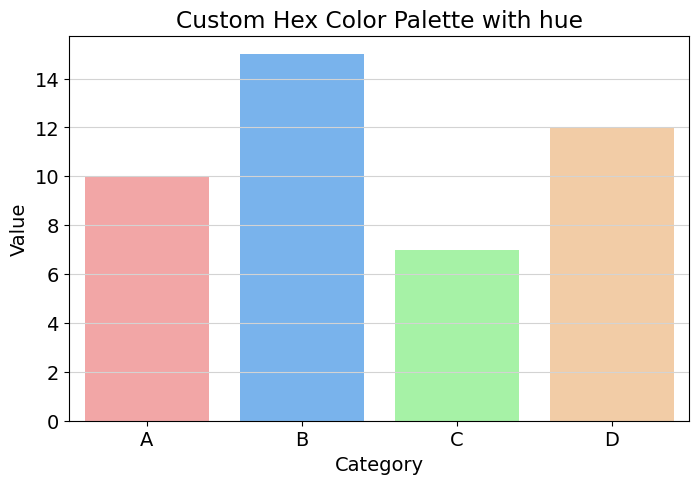

In [161]:
custom_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
sns.barplot(x='Category', y='Value', hue='Category', data=df, palette=custom_palette, legend=False)
plt.title('Custom Hex Color Palette with hue')
plt.show()


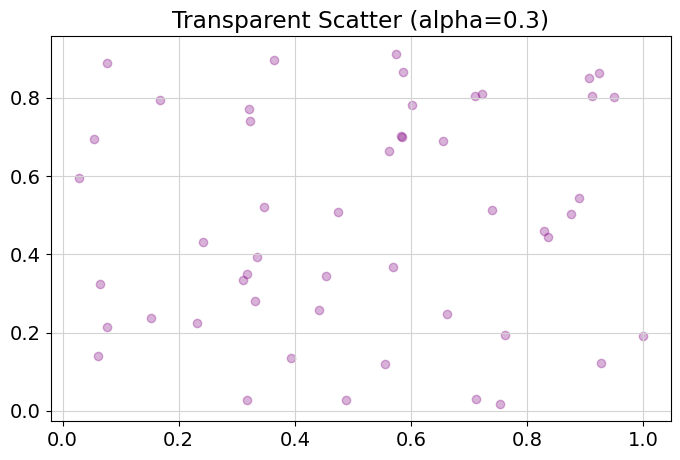

In [164]:
#Color Transparency with alpha
plt.scatter(x, y, color='purple', alpha=0.3)
plt.title('Transparent Scatter (alpha=0.3)')
plt.show()


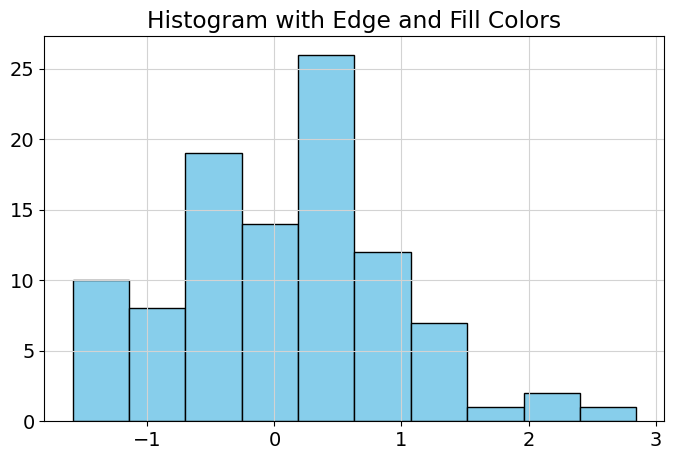

In [166]:
#Histogram with Edge Color and Face Color
data = np.random.randn(100)

plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram with Edge and Fill Colors')
plt.show()



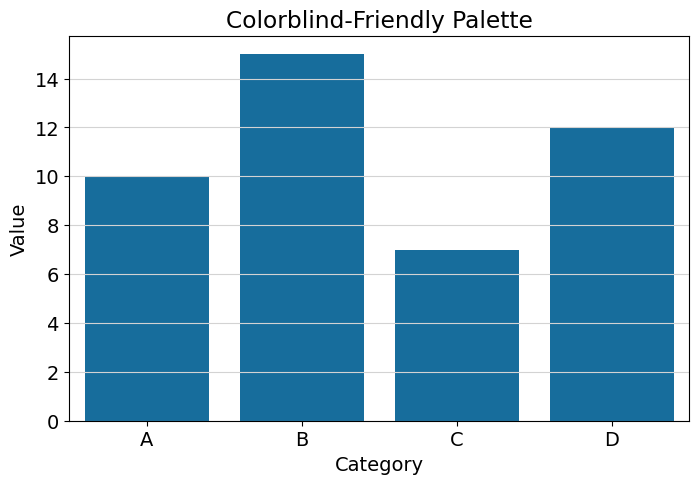

In [168]:
#Colorblind-Friendly Palette (Seaborn)
sns.set_palette("colorblind")
sns.barplot(x='Category', y='Value', data=df)
plt.title('Colorblind-Friendly Palette')
plt.show()


### What is a Color Palette?
A color palette is a set of colors selected to be used together in a chart or visualization. Palettes help ensure your charts look consistent, clear, and aesthetically pleasing.
### Types of Color Palettes

| Palette Type    | Description                          | Use Case                                                      |
| --------------- | ------------------------------------ | ------------------------------------------------------------- |
| **Qualitative** | Distinct colors without order        | Categorical data (e.g., groups)                               |
| **Sequential**  | Gradual variation from light to dark | Ordered/numerical data (low to high)                          |
| **Diverging**   | Two contrasting colors with midpoint | Data diverging around a midpoint (e.g., positive vs negative) |


### Built-in Palettes in Seaborn
Qualitative: 'Set1', 'Set2', 'Set3', 'Pastel1', 'Dark2', 'Accent'

Sequential: 'Blues', 'Greens', 'Oranges', 'Purples', 'Reds', 'BuGn'

Diverging: 'coolwarm', 'RdBu', 'bwr', 'seismic'


In [172]:
# Viewing Available Palettes
print(sns.color_palette())  # default

print(sns.color_palette("Set1"))

sns.palplot(sns.color_palette("pastel"))


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0), (0.8, 0.47058823529411764, 0.7372549019607844), (0.792156862745098, 0.5686274509803921, 0.3803921568627451), (0.984313725490196, 0.6862745098039216, 0.8941176470588236), (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.9254901960784314, 0.8823529411764706, 0.2), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]
[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.596078431372549, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (1.0, 1.0, 0.2), (0.6509803921568628, 0.33725490196078434, 0.1568627450980392), (0.9686274509803922, 0.5058823529411764, 0.749019607843


## 🎨 Challenges & Solutions with Colors in Visualization

### 1. **Too Many Colors / Overuse of Colors**

* **Challenge**: Using too many different colors makes the chart confusing and hard to read.
* **Solution**:

  * Limit the number of colors to important categories only (max \~5-7).
  * Group smaller categories into "Others."
  * Use consistent colors for the same categories across charts.

---

### 2. **Colorblindness and Accessibility**

* **Challenge**: Some viewers can’t distinguish certain colors (red-green blindness is common).
* **Solution**:

  * Use colorblind-friendly palettes like Seaborn’s `"colorblind"`, `"muted"`, or `"pastel"`.
  * Avoid using only color to convey information—combine with patterns or labels.
  * Use tools like [Coblis Color Blindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to test.

---

### 3. **Poor Contrast**

* **Challenge**: Low contrast between colors or between plot elements and background makes visualization hard to read.
* **Solution**:

  * Choose palettes with good contrast (e.g., dark colors on light background).
  * Adjust transparency (`alpha`) and edge colors to improve visibility.
  * Use light/dark themes thoughtfully.

---

### 4. **Misleading Color Scales**

* **Challenge**: Sequential or diverging color scales may be misinterpreted if not chosen properly (e.g., rainbow scale).
* **Solution**:

  * Use perceptually uniform colormaps (e.g., `'viridis'`, `'plasma'`, `'cividis'`) for continuous data.
  * Avoid rainbow or flashy colormaps unless absolutely necessary.
  * Include legends and colorbars with clear labels.

---

### 5. **Inconsistent Color Usage**

* **Challenge**: Same categories or variables colored differently across charts confuse viewers.
* **Solution**:

  * Define a consistent color palette at the start of your project.
  * Reuse the palette in all related plots.
  * Use named colors or hex codes explicitly.

---

### 6. **Overlapping Colors in Scatter / Bubble Plots**

* **Challenge**: Points with overlapping colors or markers become indistinguishable.
* **Solution**:

  * Use transparency (`alpha`).
  * Vary marker shapes or sizes along with color.
  * Use jitter or smaller markers.

---

### 7. **Printing and Grayscale Compatibility**

* **Challenge**: Colors that look distinct on screen may be indistinguishable in grayscale print.
* **Solution**:

  * Test charts in grayscale before printing.
  * Use patterns, line styles, or shapes in addition to color.
  * Choose palettes with different lightness levels.

---

### Summary Table

| Challenge                 | Solution                                  |
| ------------------------- | ----------------------------------------- |
| Too many colors           | Limit palette size, group categories      |
| Colorblindness            | Use colorblind-friendly palettes          |
| Poor contrast             | Adjust colors, use edges and transparency |
| Misleading color scales   | Use perceptually uniform colormaps        |
| Inconsistent colors       | Define & reuse palettes                   |
| Overlapping points        | Use alpha, jitter, marker variations      |
| Grayscale incompatibility | Test grayscale, use patterns & shapes     |

---


### What are Stylesheets?
Stylesheets in Matplotlib are predefined sets of parameters that control the look of your plots — colors, fonts, grid styles, line widths, background colors, etc.

Using stylesheets, you can quickly switch the entire look of your plots without rewriting code.


### Built-in Stylesheets
| Style Name          | Description                       |
| ------------------- | --------------------------------- |
| `'classic'`         | Original Matplotlib look          |
| `'ggplot'`          | Inspired by ggplot2 from R        |
| `'seaborn'`         | Similar to Seaborn default styles |
| `'bmh'`             | From Bayesian Methods for Hackers |
| `'dark_background'` | Dark background, bright colors    |
| `'fast'`            | Optimized for speed               |


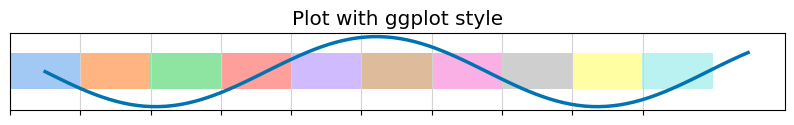

In [177]:
#How to Use Stylesheets
#Method 1: Context manager (with statement)
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.title("Plot with ggplot style")
    plt.show()


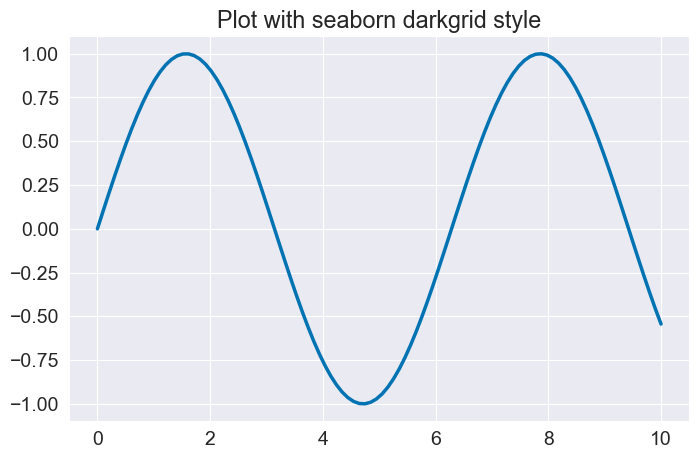

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')  # <-- This sets Seaborn style globally

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Plot with seaborn darkgrid style")
plt.show()


In [180]:
#View Available Styles
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


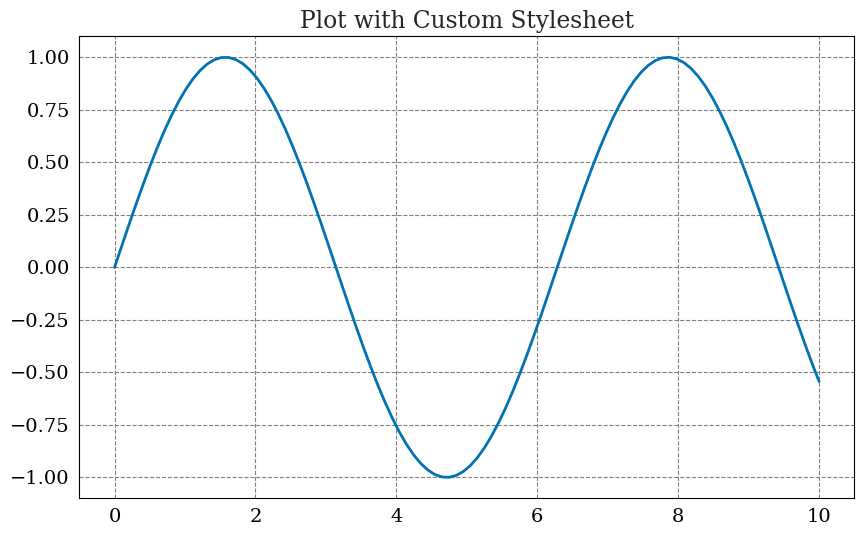

In [183]:
import matplotlib.pyplot as plt

plt.style.use(r"C:\Users\ashid\OneDrive\Documents\mystyle.mplstyle.txt")  

# If saved elsewhere, use full path:
# plt.style.use(r'C:\path\to\mystyle.mplstyle')

import numpy as np
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Plot with Custom Stylesheet")
plt.show()


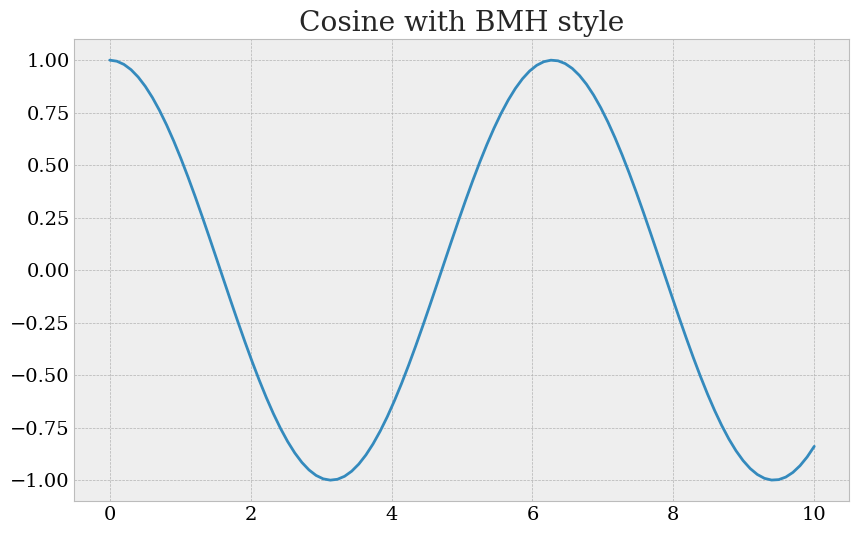

In [184]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.cos(x)

plt.style.use('bmh')
plt.plot(x, y)
plt.title("Cosine with BMH style")
plt.show()



## 🎨 Challenges & Solutions with Matplotlib Stylesheets

### 1. **Stylesheet Not Found or Not Loaded**

* **Challenge**: You get an error saying your `.mplstyle` file can’t be found or isn’t applied.
* **Solution**:

  * Make sure the file is saved with the `.mplstyle` extension.
  * Place the file in your current working directory or use the full absolute file path in `plt.style.use()`.
  * Check for typos in the filename or path.

```python
plt.style.use('mystyle.mplstyle')  # if in current folder
# or
plt.style.use(r'C:/path/to/mystyle.mplstyle')  # absolute path
```

---

### 2. **Incorrect Syntax in `.mplstyle` File**

* **Challenge**: The stylesheet is ignored or throws errors because of syntax mistakes.
* **Solution**:

  * Use `key: value` format exactly, no equal signs or other separators.
  * Avoid trailing commas or quotes unless the value requires them.
  * Comments start with `#` and must be on their own line.

---

### 3. **Styles Not Fully Applied**

* **Challenge**: Some plot elements don’t change as expected when using your stylesheet.
* **Solution**:

  * Verify that the style keys you used are valid rcParams (see `matplotlib.rcParams.keys()`).
  * Some elements require additional parameters or can be overridden by plot-specific calls.
  * Use global style early before creating plots.

---

### 4. **Conflict Between Multiple Styles**

* **Challenge**: When combining multiple styles or using Seaborn’s styles with Matplotlib’s, styles can conflict.
* **Solution**:

  * Use `plt.style.use()` carefully; the last style loaded overrides earlier ones.
  * When using Seaborn, set style first with `sns.set_style()` before Matplotlib styles.
  * Consider creating a combined `.mplstyle` with parameters from both.

---

### 5. **Difficulty Debugging Style Issues**

* **Challenge**: It’s hard to tell why a style isn’t working or what values are set.
* **Solution**:

  * Print current rcParams with:

    ```python
    import matplotlib as mpl
    print(mpl.rcParams)
    ```

  * Use `%matplotlib inline` in Jupyter to see plots instantly.

  * Test style changes on simple plots first.

---

### 6. **Limited Control on Some Plot Elements**

* **Challenge**: Some aspects (like legends or annotations) may not be styleable directly via rcParams.
* **Solution**:

  * Set these manually in code after applying stylesheets.
  * Or extend your style by customizing plots programmatically.

---

## Summary Table

| Challenge                              | Solution                                            |
| -------------------------------------- | --------------------------------------------------- |
| Stylesheet not found                   | Use correct path, file extension                    |
| Syntax errors in `.mplstyle`           | Follow `key: value` format, avoid typos             |
| Styles partially applied               | Check valid keys, set style before plotting         |
| Style conflicts (Seaborn + Matplotlib) | Load Seaborn style first, combine styles cautiously |
| Hard to debug style problems           | Print rcParams, test on simple plots                |
| Limited styling on some elements       | Set manually in code after applying style           |

---


 #### What is rcParams in Matplotlib?
rcParams (runtime configuration parameters) is a Python dictionary-like object in Matplotlib that stores all default settings controlling the appearance of your plots.

##### These settings include:

Figure size and DPI

Font family, size, and style

Line width, color, and style

Axes properties like grid, color, and tick size

Legend style and position

And many more!

You can view, modify, and save these parameters to customize your plots globally.

In [189]:
#How to Use rcParams
#View All Current rcParams
import matplotlib as mpl
print(mpl.rcParams)


_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: #bcbcbc
axes.facecolor: #eeeeee
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: large
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

In [191]:
# Get a Specific Parameter
print(mpl.rcParams['lines.linewidth'])  # Default line width
print(mpl.rcParams['font.size'])        # Default font size


2.0
14.0


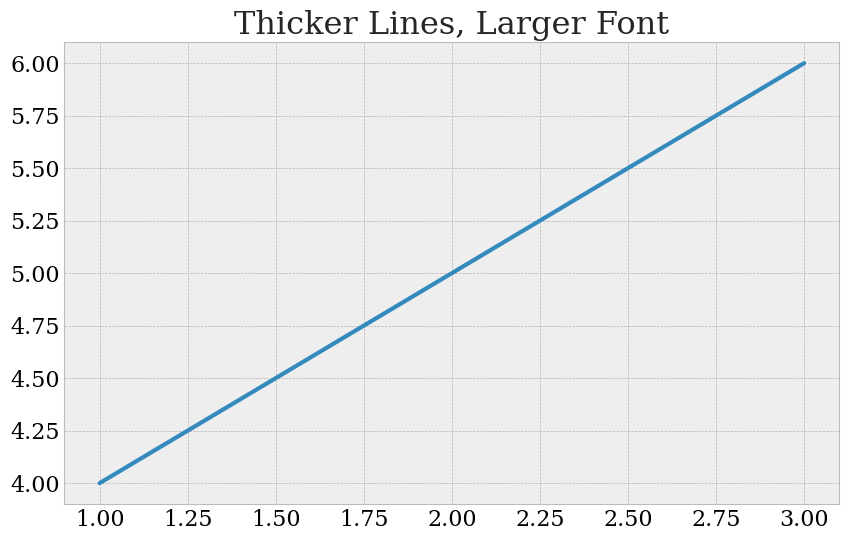

In [193]:
#Set/Change a Parameter Temporarily
import matplotlib.pyplot as plt

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Thicker Lines, Larger Font")
plt.show()


In [195]:
#Reset to Default
mpl.rcParams.update(mpl.rcParamsDefault)


### Commonly Used rcParams Keys
| Parameter         | Description                      | Example Value     |
| ----------------- | -------------------------------- | ----------------- |
| `figure.figsize`  | Figure width and height (inches) | `(10, 6)`         |
| `figure.dpi`      | Dots per inch (resolution)       | `100`             |
| `axes.titlesize`  | Title font size                  | `'large'` or `16` |
| `axes.labelsize`  | X and Y axis label font size     | `'medium'`        |
| `axes.grid`       | Show grid or not                 | `True` or `False` |
| `grid.color`      | Grid color                       | `'gray'`          |
| `grid.linestyle`  | Grid line style                  | `'--'`            |
| `lines.linewidth` | Width of plotted lines           | `2`               |
| `lines.linestyle` | Line style (solid, dashed, etc.) | `'-'`, `'--'`     |
| `lines.color`     | Default line color               | `'blue'`          |
| `font.size`       | Global font size                 | `12`              |
| `xtick.labelsize` | X-axis tick label font size      | `10`              |
| `ytick.labelsize` | Y-axis tick label font size      | `10`              |
| `legend.fontsize` | Legend font size                 | `'small'`         |


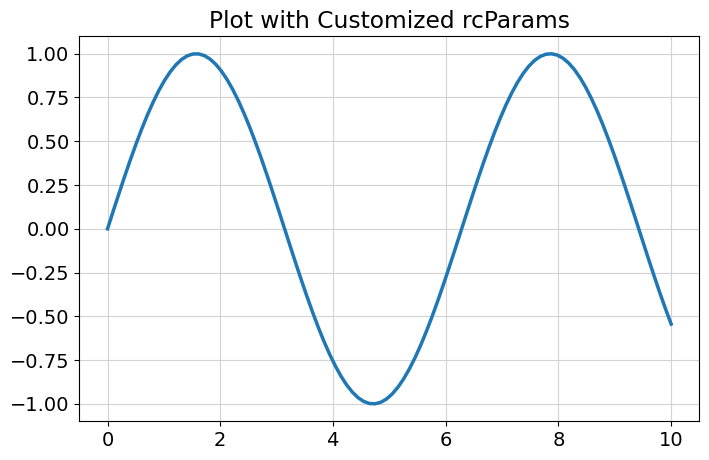

In [198]:
#Setting rcParams in Script
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Change global style parameters
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'lightgray'
mpl.rcParams['font.size'] = 14

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Plot with Customized rcParams")
plt.show()


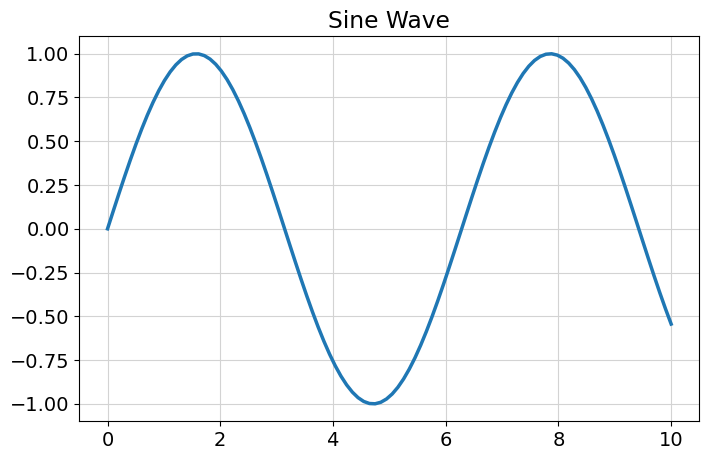

In [200]:
#Saving Figures and Images in Matplotlib
#Basic Saving with plt.savefig()
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")

# Save the figure before plt.show()
plt.savefig("myplot.png")  # Saves as PNG by default
plt.show()


### Common File Formats Supported
PNG (.png) — raster, lossless, default, good for web

JPG/JPEG (.jpg, .jpeg) — raster, lossy compression

PDF (.pdf) — vector format, scalable for print

SVG (.svg) — vector format, editable in vector graphic editors

EPS (.eps) — vector format for publishing

In [203]:
plt.savefig("myplot.pdf")  # Save as PDF vector graphic


# Important Parameters of savefig()
| Parameter     | Description                                   | Example                                       |
| ------------- | --------------------------------------------- | --------------------------------------------- |
| `fname`       | Filename or path (string)                     | `"plots/figure1.png"`                         |
| `dpi`         | Resolution in dots per inch                   | `plt.savefig("fig.png", dpi=300)`             |
| `transparent` | If True, figure background is transparent     | `plt.savefig("fig.png", transparent=True)`    |
| `bbox_inches` | What part to save, `'tight'` trims whitespace | `plt.savefig("fig.png", bbox_inches='tight')` |
| `pad_inches`  | Padding around the figure (default 0.1 inch)  | `plt.savefig("fig.png", pad_inches=0.2)`      |


In [206]:
plt.savefig("highres_plot.png", dpi=300, bbox_inches='tight')


In [208]:
#Save Figure from Figure Object
fig, ax = plt.subplots()
ax.plot(x, y)
fig.savefig("my_figure.svg")


<Figure size 800x500 with 0 Axes>

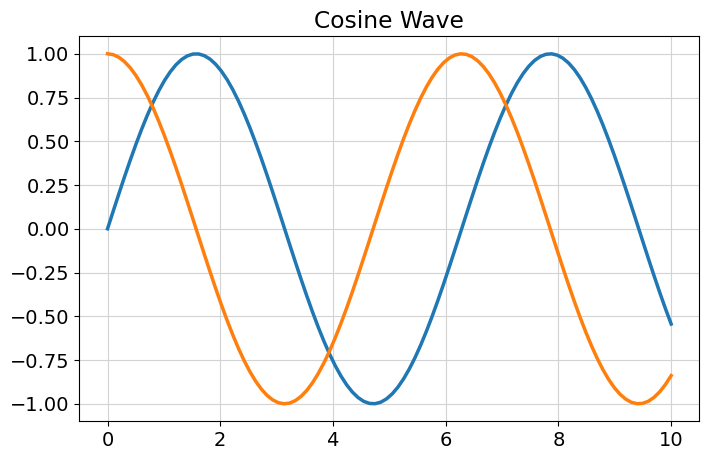

In [210]:
#Complete Script Saving PNG & PDF
import matplotlib.pyplot as plt
import numpy as np
import os

x = np.linspace(0, 10, 100)
y = np.cos(x)

plt.plot(x, y)
plt.title("Cosine Wave")

output_dir = "saved_plots"
os.makedirs(output_dir, exist_ok=True)  # Create folder if not exists

plt.savefig(f"{output_dir}/cosine_plot.png", dpi=300, bbox_inches='tight')
plt.savefig(f"{output_dir}/cosine_plot.pdf")

plt.show()
